In [450]:
import numpy as np; import scipy as sp; import pandas as pd; 
import statsmodels.api as sm 
import pylab as py ; import matplotlib.pyplot as plt; 

In [451]:
path = "D:\Downloads\WL"

## Import Cancelled Trips and Add to Complete Trips

In [452]:
df_cancel = pd.read_csv(path +"\\cancelled_deduped_HyeongcheolPark_20210212 GC March 4 2021.csv")
df_complete = pd.read_csv(path +"\\completed_deduped_HyeongcheolPark_20210212 gc feb 13.csv")

C:\Users\haoto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [453]:
df_complete

,id,orderid,rider_username,driver_id,driver.rate,score_count,Order_complet_count,Order_rider_cancle_count,order_admin_cancle_count,car_desc,...,tsr_osrm,pickup_date.time,pickup_date.time_osrm,trip_update_date.time,total.trip.cycle,driver.wait.time,delay,delay.osrm,address_fromto,dedup_index
0,4,1347152,1.778241e+10,1184,5.0,1346,2057,175,16,Toyota Camry,...,-1.066667,2019/7/31 23:50,2019/7/31 23:52,2019/8/1 10:04,NaN,NaN,-4,-2,"CF Richmond Centre,Number 3 Road, Richmond, BC...","CF Richmond Centre,Number 3 Road, Richmond, BC..."
1,6,1347147,1.236889e+10,162,5.0,457,654,43,2,Tesla Model X,...,-0.250000,2019/7/31 23:48,2019/7/31 23:50,2019/8/1 23:43,NaN,NaN,-3,-1,"4771 Garden City Rd, Richmond, BC V6X 3M7, Can...","4771 Garden City Rd, Richmond, BC V6X 3M7, Can..."
2,10,1347138,1.778981e+10,95,5.0,3114,4504,812,65,Lexus RX,...,7.016667,2019/7/31 23:52,2019/7/31 23:51,2019/8/5 19:47,NaN,NaN,7,7,"2976 Cliffrose Crescent,Coquitlam, BC, Canada ...","2976 Cliffrose Crescent,Coquitlam, BC, Canada ..."
3,13,1347135,1.250687e+10,488,5.0,8665,11369,560,82,Toyota Prius,...,0.383333,2019/7/31 23:39,2019/7/31 23:43,2019/8/1 14:42,NaN,NaN,-4,0,"JiangHu ??-??????,Canada, British Columbia, Ri...","JiangHu ??-??????,Canada, British Columbia, Ri..."
4,14,1347132,1.778317e+10,1333,5.0,2038,3471,386,15,Mazda CX-9,...,-2.266667,2019/7/31 23:42,2019/7/31 23:39,2019/9/11 1:13,NaN,NaN,0,-3,"7371 Westminster Highway,Richmond, BC, Canada ...","7371 Westminster Highway,Richmond, BC, Canada ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579724,657460,682434,1.778513e+10,1509,4.9,411,472,91,8,Tesla Model X,...,12.550000,2018/11/1 7:56,2018/11/1 7:57,2018/11/1 8:00,16M 19S,34S,11,12,"2985 West 15th Avenue, Vancouver, BC, Canada S...","2985 West 15th Avenue, Vancouver, BC, Canada S..."
579725,657461,682401,1.604724e+10,306,5.0,2085,2329,608,30,Audi A4,...,4157.383000,2018/11/3 15:30,2018/11/3 15:33,2018/11/3 15:53,2d 21H 52M 1S,14M 32S,180,180,"1618 West 62nd Avenue,Vancouver, BC, Canada 50...","1618 West 62nd Avenue,Vancouver, BC, Canada 50..."
579726,657463,681993,1.778683e+10,1326,5.0,335,452,73,6,Nissan Sentra,...,-4.050000,2018/11/1 6:28,2018/11/1 6:25,2018/11/1 6:40,43M 0S,32M 15S,-2,-5,"7831 Westminster Hwy,Richmond, BC, Canada YVR ...","7831 Westminster Hwy,Richmond, BC, Canada YVR ..."
579727,657464,681991,1.778865e+10,259,5.0,110,150,51,3,Audi A4,...,2590.983000,2018/11/2 10:38,2018/11/2 10:40,2018/11/2 11:05,NaN,NaN,180,180,"SFU Transit Exchange @ Bay 2, Burnaby, BC V5A,...","SFU Transit Exchange @ Bay 2, Burnaby, BC V5A,..."


Clean Data

In [454]:
investigate = df_complete[pd.to_datetime(df_complete["finish_date.time"]) - pd.to_datetime(df_complete["start_date.time"]) < "00:02:00"][["orderid","rider_username","driver_id","distance","price","start_date.time","finish_date.time","duration"]].sort_values(by=["driver_id","start_date.time"], ascending=False)
investigate.columns = ["orderid","rider_username","driver_id","distance","price","start_date_time","finish_date_time","duration"]
investigate.start_date_time = pd.to_datetime(investigate.start_date_time)
investigate.finish_date_time = pd.to_datetime(investigate.finish_date_time)

investigate['Difference'] = np.where(investigate.driver_id == investigate.driver_id.shift(), investigate.start_date_time.shift() - investigate.finish_date_time, np.nan)

df_complete_clean = df_complete[~df_complete.orderid.isin(investigate[investigate["Difference"] < "00:02:00"].orderid)]

In [455]:
df_complete_clean

,id,orderid,rider_username,driver_id,driver.rate,score_count,Order_complet_count,Order_rider_cancle_count,order_admin_cancle_count,car_desc,...,tsr_osrm,pickup_date.time,pickup_date.time_osrm,trip_update_date.time,total.trip.cycle,driver.wait.time,delay,delay.osrm,address_fromto,dedup_index
0,4,1347152,1.778241e+10,1184,5.0,1346,2057,175,16,Toyota Camry,...,-1.066667,2019/7/31 23:50,2019/7/31 23:52,2019/8/1 10:04,NaN,NaN,-4,-2,"CF Richmond Centre,Number 3 Road, Richmond, BC...","CF Richmond Centre,Number 3 Road, Richmond, BC..."
1,6,1347147,1.236889e+10,162,5.0,457,654,43,2,Tesla Model X,...,-0.250000,2019/7/31 23:48,2019/7/31 23:50,2019/8/1 23:43,NaN,NaN,-3,-1,"4771 Garden City Rd, Richmond, BC V6X 3M7, Can...","4771 Garden City Rd, Richmond, BC V6X 3M7, Can..."
2,10,1347138,1.778981e+10,95,5.0,3114,4504,812,65,Lexus RX,...,7.016667,2019/7/31 23:52,2019/7/31 23:51,2019/8/5 19:47,NaN,NaN,7,7,"2976 Cliffrose Crescent,Coquitlam, BC, Canada ...","2976 Cliffrose Crescent,Coquitlam, BC, Canada ..."
3,13,1347135,1.250687e+10,488,5.0,8665,11369,560,82,Toyota Prius,...,0.383333,2019/7/31 23:39,2019/7/31 23:43,2019/8/1 14:42,NaN,NaN,-4,0,"JiangHu ??-??????,Canada, British Columbia, Ri...","JiangHu ??-??????,Canada, British Columbia, Ri..."
4,14,1347132,1.778317e+10,1333,5.0,2038,3471,386,15,Mazda CX-9,...,-2.266667,2019/7/31 23:42,2019/7/31 23:39,2019/9/11 1:13,NaN,NaN,0,-3,"7371 Westminster Highway,Richmond, BC, Canada ...","7371 Westminster Highway,Richmond, BC, Canada ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579724,657460,682434,1.778513e+10,1509,4.9,411,472,91,8,Tesla Model X,...,12.550000,2018/11/1 7:56,2018/11/1 7:57,2018/11/1 8:00,16M 19S,34S,11,12,"2985 West 15th Avenue, Vancouver, BC, Canada S...","2985 West 15th Avenue, Vancouver, BC, Canada S..."
579725,657461,682401,1.604724e+10,306,5.0,2085,2329,608,30,Audi A4,...,4157.383000,2018/11/3 15:30,2018/11/3 15:33,2018/11/3 15:53,2d 21H 52M 1S,14M 32S,180,180,"1618 West 62nd Avenue,Vancouver, BC, Canada 50...","1618 West 62nd Avenue,Vancouver, BC, Canada 50..."
579726,657463,681993,1.778683e+10,1326,5.0,335,452,73,6,Nissan Sentra,...,-4.050000,2018/11/1 6:28,2018/11/1 6:25,2018/11/1 6:40,43M 0S,32M 15S,-2,-5,"7831 Westminster Hwy,Richmond, BC, Canada YVR ...","7831 Westminster Hwy,Richmond, BC, Canada YVR ..."
579727,657464,681991,1.778865e+10,259,5.0,110,150,51,3,Audi A4,...,2590.983000,2018/11/2 10:38,2018/11/2 10:40,2018/11/2 11:05,NaN,NaN,180,180,"SFU Transit Exchange @ Bay 2, Burnaby, BC V5A,...","SFU Transit Exchange @ Bay 2, Burnaby, BC V5A,..."


Join Cancelled trips to complete trips

In [456]:
df_clean = df_complete_clean.append(df_cancel,ignore_index=True)
df_clean = df_clean[df_clean["driver_id"] != -1]

In [457]:
df_clean = df_clean.drop(columns=["id"])

Take out rider username 8.61e+12 and 8.62e+12 as these are not individual riders, if this was a real rider, they rose 10415 trips, next to impossible, and by looking at the start times many start at exact same times, this looks to be data errors. 

In [458]:
df_clean = df_clean[~df_clean["rider_username"].isin([8.610000e+12,8.620000e+12])]

In [459]:
print(df_clean["start_date.time"].min())
print(df_clean["start_date.time"].max())

2018/10/27 2:37
2019/7/9 9:59


### Fixing Addresses

In [460]:
cities = ['Richmond', 'Coquitlam','Vancouver','Burnaby', 'Victoria','North Vancouver','Surrey','New Westminster',\
          'West Vancouver', "Port Coquitlam", "Port Moody", "Saanich","Tsawwassen", "Delta", "Abbotsford","New West",\
          "White Rock","Sidney","Nanaimo","Langley City", "Steveston","Parksville","English Bay","Walnut Grove",\
          "Pitt Meadows", "Swartz Bay","Anmore","Langley","Maple Ridge","North Saanich", "Langford", "Aldergrove",\
          "Brentwood Bay", "Mission","Duncan","Spanish Banks Beach", "Greater Vancouver A", "University Endowment Lands",\
          "Belcarra", "Sooke", "Oak Bay","Saanichton","Langley Township","Chilliwack","Downtown Vancouver",\
          "City of Vancouver", "Bowen Island","Colwood","Malahat","Cassidy","Esquimalt"]

df_clean["cities_to"] = df_clean.address_to.str.split(',').str[-3].str.strip()
df_clean["cities_from"] = df_clean.address_from.str.split(',').str[-3].str.strip()
df_clean.loc[~df_clean['cities_to'].isin(cities), 'cities_to'] = df_clean.address_to.str.split(',').str[-1].str.strip()
df_clean.loc[~df_clean['cities_to'].isin(cities), 'cities_to'] = df_clean.address_to.str.split(',').str[-2].str.strip()
df_clean.loc[~df_clean['cities_to'].isin(cities), 'cities_to'] = df_clean.address_to.str.split(',').str[-4].str.strip()
df_clean.loc[~df_clean['cities_from'].isin(cities), 'cities_from'] = df_clean.address_from.str.split(',').str[-1].str.strip()
df_clean.loc[~df_clean['cities_from'].isin(cities), 'cities_from'] = df_clean.address_from.str.split(',').str[-2].str.strip()
df_clean.loc[~df_clean['cities_from'].isin(cities), 'cities_from'] = df_clean.address_from.str.split(',').str[-4].str.strip()

I will remove all other trips that have issues with address

In [461]:
df_clean = df_clean[(df_clean['cities_to'].isin(cities)) & (df_clean['cities_from'].isin(cities))]

Upon investigation I will group University Endowment Lands, Greater Vancouver A, Spanish Banks, Downtown Vancouver, City of Vancouver, English Bay, Bowen Island (only accessible from Vancouver) to Vancouver; Langley City, Walnut Grove, Aldergrove, Langley Township to Langley; New West to New Westminster; Colwood, Langford, Oak Bay, Saanichton, Saanich, Duncan, North Saanich, Malahat, Esquimalt, Swartz Bay, Brentwood Bay, Sooke, Sidney to Victoria; Cassidy to Nanaimo; Steveston to Richmond; Port Moody, Belcarra, Anmore to Coquitlam, Pitt Meadows to Maple Ridge; Abbotsford, Chilliwack, Mission to Interior, Tsawwassen to Delta

In [462]:
vancouver = ["University Endowment Lands", "Greater Vancouver A", "Spanish Banks Beach",\
             "Downtown Vancouver", "City of Vancouver","English Bay", "Bowen Island"]
df_clean.loc[df_clean['cities_to'].isin(vancouver), 'cities_to'] = "Vancouver"
df_clean.loc[df_clean['cities_from'].isin(vancouver), 'cities_from'] = "Vancouver"

langley = ["Langley City","Walnut Grove","Aldergrove","Langley Township"]
df_clean.loc[df_clean['cities_to'].isin(langley), 'cities_to'] = "Langley"
df_clean.loc[df_clean['cities_from'].isin(langley), 'cities_from'] = "Langley"

df_clean.loc[df_clean['cities_to'] == "New West", 'cities_to'] = "New Westminster"
df_clean.loc[df_clean['cities_from'] == "New West", 'cities_from'] = "New Westminster"

victoria = ["Colwood", "Langford","Oak Bay","Saanichton","Saanich","North Saanich","Malahat",\
            "Esquimalt", "Sidney","Swartz Bay", "Brentwood Bay", "Duncan", "Sooke"]
df_clean.loc[df_clean['cities_to'].isin(victoria), 'cities_to'] = "Victoria"
df_clean.loc[df_clean['cities_from'].isin(victoria), 'cities_from'] = "Victoria"

df_clean.loc[df_clean['cities_to'] == "Cassidy", 'cities_to'] = "Nanaimo"
df_clean.loc[df_clean['cities_from'] == "Cassidy", 'cities_from'] = "Nanaimo"

df_clean.loc[df_clean['cities_to'] == "Steveston", 'cities_to'] = "Richmond"
df_clean.loc[df_clean['cities_from'] == "Steveston", 'cities_from'] = "Richmond"

coquitlam = ["Port Moody", "Belcarra","Anmore"]
df_clean.loc[df_clean['cities_to'].isin(coquitlam), 'cities_to'] = "Coquitlam"
df_clean.loc[df_clean['cities_from'].isin(coquitlam), 'cities_from'] = "Coquitlam"

df_clean.loc[df_clean['cities_to'] == "Pitt Meadows", 'cities_to'] = "Maple Ridge"
df_clean.loc[df_clean['cities_from'] == "Pitt Meadows", 'cities_from'] = "Maple Ridge"

df_clean.loc[df_clean['cities_to'] == "Tsawwassen", 'cities_to'] = "Delta"
df_clean.loc[df_clean['cities_from'] == "Tsawwassen", 'cities_from'] = "Delta"

interior = ["Abbotsford", "Chilliwack", "Mission"]
df_clean.loc[df_clean['cities_to'].isin(interior), 'cities_to'] = "Interior"
df_clean.loc[df_clean['cities_from'].isin(interior), 'cities_from'] = "Interior"

df_clean["cities_from_to"] = df_clean["cities_from"] + "->" + df_clean["cities_to"]

Clean Datetimes

In [463]:
df_clean["start_date.time"] = pd.to_datetime(df_clean["start_date.time"])
df_clean["finish_date.time"] = pd.to_datetime(df_clean["finish_date.time"])
df_clean["pickup_date.time"] = pd.to_datetime(df_clean["pickup_date.time"])
df_clean["day_start"] = df_clean["start_date.time"].dt.day_name() 
df_clean["hour_start"] = df_clean["start_date.time"].dt.hour.apply(str)
df_clean["hour_day_start"] = df_clean["hour_start"] + " " + df_clean["day_start"]
df_clean["day_end"] = df_clean["finish_date.time"].dt.day_name() 
df_clean["hour_end"] = df_clean["finish_date.time"].dt.hour.apply(str)
df_clean["hour_day_end"] = df_clean["hour_end"] + " " + df_clean["day_end"]

In [464]:
#lookup_trips_by_time_df = df_clean[["driver_id","round_start_date_time","cities_from_to","orderid"]].groupby(["round_start_date_time","driver_id","cities_from_to"]).count().sort_values(by="orderid", ascending=False).unstack().reset_index()
#lookup_trips_by_time_df["hour_day_start"] = lookup_trips_by_time_df["round_start_date_time"].dt.hour.apply(str) + " " + lookup_trips_by_time_df["round_start_date_time"].dt.day_name()
#lookup_trips_by_time_df

### Extracting Actual Cancelled Trips
Some cancelled trips are "reorders" where a customers may cancel a ride just to order another one, I will remove those as they are not "real" cancellations

In [465]:
df_clean = df_clean.sort_values(by=["rider_username","start_date.time"],ascending=False)
df_clean[["rider_username","driver_id","order_status","start_date.time","address_from"]]
df_clean["start_date_time"] = df_clean["start_date.time"]
df_clean["Reorder"] = np.where((df_clean.rider_username == df_clean.rider_username.shift())\
                               & (df_clean.order_status.shift() == "completed")
                               & (df_clean.order_status != "completed")
                               & (df_clean.start_date_time.shift() - df_clean.start_date_time < "00:15:00"),1, np.nan)
df_clean = df_clean[df_clean["Reorder"] != 1]
df_clean.drop(['Reorder'],axis = 1, inplace = True)

## Demand

Number of pickups (includes complete and cancelled) in given date time in a location

In [466]:
pickups = df_clean[["hour_day_start","cities_from","orderid"]].groupby(["hour_day_start","cities_from"]).count().sort_values(by="orderid", ascending=False).unstack().reset_index()
pickups.to_csv(path +"\\Total Pickups.csv")

Average time between end of a trip and the start of a new trip, if the time between a trip is greater than 30 minutes we consider that the driver is on a break or is finish for the day

In [467]:
df_wait = df_clean[df_clean["order_status"] == "completed"].sort_values(by=["driver_id","start_date_time"],ascending=False)
df_wait["finish_date_time"] = df_wait["finish_date.time"]
df_wait.loc[df_wait['is_reservation'] == 1, 'start_date_time'] = df_wait["pickup_date.time"]
df_wait = df_wait.sort_values(by=["driver_id","start_date_time"],ascending=False)
df_wait["driver_wait"] = np.where((df_wait.driver_id == df_wait.driver_id.shift()),
                                   (df_wait.start_date_time.shift() - df_wait.finish_date_time).astype('timedelta64[m]') , np.nan)

wait_time = df_wait[(df_wait["driver_wait"] <= 30) & (df_wait["driver_wait"] > 0)][["hour_day_start","cities_from","driver_wait"]].groupby(["hour_day_start","cities_from"]).mean().sort_values(by="driver_wait", ascending=False).unstack().reset_index()
wait_time.to_csv(path +"\\Time between Trips for Drivers.csv")

Truly cancelled Trips can be seen as unmet demand

In [468]:
cancel_trips = df_clean[df_clean["order_status"] != "completed"][["hour_day_start","cities_from","orderid"]].groupby(["hour_day_start","cities_from"]).count().sort_values(by="orderid", ascending=False).unstack().reset_index()
cancel_trips.to_csv(path +"\\Total Cancelled.csv")

## Supply

Average number of drivers during the period in the specific location

In [469]:
df_clean['round_start_date_time'] = df_clean['start_date.time'].apply(lambda x: x.replace(minute=0, second=0))
num_drivers = df_clean[["driver_id","cities_from","round_start_date_time"]].groupby(["round_start_date_time","cities_from"]).nunique().unstack().reset_index()
num_drivers["hour_day_start"] = num_drivers["round_start_date_time"].dt.hour.apply(str) + " " + num_drivers["round_start_date_time"].dt.day_name()
num_drivers.drop(columns=["round_start_date_time"], inplace = True)
num_drivers.groupby("hour_day_start").mean().to_csv(path +"\\Average Drivers by Location.csv")

C:\Users\haoto\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Number of drop offs in given date time in a location

In [470]:
dropoffs = df_clean[["hour_day_end","cities_to","orderid"]].groupby(["hour_day_end","cities_to"]).count().sort_values(by="orderid", ascending=False).unstack().reset_index()
dropoffs.to_csv(path +"\\Total Drop Offs.csv")

## Wait Time

Wait time (time between placing order and pickup) can be a proxy to whether or not the supply meets the demand, the shorter the wait time the more abundant the supply. We exclude reserved trips as their wait times are not representative of whether supply meets demand

In [471]:
print(len(df_clean[(df_clean["order_status"] == "completed")]))
print(len(df_clean[(df_clean["order_status"] == "completed") & (df_clean["delay"] >= 0)]))

569092
486140


Some of the delays: pickup time (when the rider was picked up) - start time (when the order was placed) were negative, so we have to exclude those in finding the average wait times

In [472]:
delay = df_clean[(df_clean["order_status"] == "completed") & (df_clean["is_reservation"] == 0) & (df_clean["delay"] >= 0)][["hour_day_start","cities_from","delay"]].groupby(["hour_day_start","cities_from"]).mean().sort_values(by="delay", ascending=False).unstack().reset_index()
delay.to_csv(path +"\\Time to Pickup for Customers.csv")

## Revenue

By Starting Location

In [473]:
revenue = df_clean[["driver_id","round_start_date_time","cities_from","price"]].groupby(["round_start_date_time","driver_id","cities_from"]).sum().unstack().reset_index()
revenue["hour_day_start"] = revenue["round_start_date_time"].dt.hour.apply(str) + " " + revenue["round_start_date_time"].dt.day_name()
revenue.drop(columns=["round_start_date_time","driver_id"], inplace = True)
revenue.groupby("hour_day_start").mean().to_csv(path +"\\Average Revenue by Location.csv")

C:\Users\haoto\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Income vs Driving Behavior
We consider the driving behavior of top earners by $/hour, the hypothesis is that these top earners will gravitate towards higher earning areas. We will exclude Delta, Interior, Langley, Maple Ridge, Nanaimo, Victoria, and White Rock in this analysis. We will score drivers, driving in the top average revenue area at a given time will get 8 points, and the second highest average revenue area will get 8 points and so on and driving in the lowest earning area will result in no points. And then all points across all time periods will be aggregated. We then record the average score

By Starting and Ending Location

In [474]:
exclude = ["Delta","Interior","Langley","Maple Ridge","Nanaimo","Victoria","White Rock"]
revenue_from_to = df_clean[(~df_clean.cities_from.isin(exclude)) & (~df_clean.cities_to.isin(exclude))]\
                  [["driver_id","round_start_date_time","cities_from_to","price"]].groupby(["round_start_date_time","driver_id","cities_from_to"]).sum().unstack().reset_index()
revenue_from_to["hour_day_start"] = revenue_from_to["round_start_date_time"].dt.hour.apply(str) + " " + revenue_from_to["round_start_date_time"].dt.day_name()
revenue_from_to.drop(columns=["round_start_date_time","driver_id"], inplace = True)
revenue_from_to.groupby("hour_day_start").mean().to_csv(path +"\\Average Revenue by From To.csv")

In [475]:
df_score = pd.read_csv(path +"\\Region Scores.csv")
df_score

,cities_from,Burnaby,Coquitlam,New Westminster,North Vancouver,Port Coquitlam,Richmond,Surrey,Vancouver,West Vancouver
0,0 Friday,5,2,3,1,0,6,7,4,8
1,0 Monday,3,1,0,6,5,4,8,2,7
2,0 Saturday,3,4,1,7,0,5,8,2,6
3,0 Sunday,2,0,3,7,6,5,8,4,1
4,0 Thursday,4,1,0,5,6,3,7,2,8
...,...,...,...,...,...,...,...,...,...,...
163,9 Saturday,4,5,2,7,0,1,6,3,8
164,9 Sunday,4,3,2,5,7,1,6,0,8
165,9 Thursday,5,3,2,6,0,4,8,1,7
166,9 Tuesday,5,0,2,8,3,4,7,1,6


$/h by driver

In [476]:
driver_earnings = df_clean[["driver_id","round_start_date_time","price"]].groupby(["round_start_date_time","driver_id"]).sum().unstack().reset_index()
driver_earnings.mean().to_csv(path +"\\Driver Earnings per Hour.csv")

<ipython-input-476-a69ad30b00c4>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  driver_earnings.mean().to_csv(path +"\\Driver Earnings per Hour.csv")


Driver Location: to simply we assume that the location of the first trip during the hour will be where the driver operates, in the next steps of the analysis I will use more complex methods of analysis

In [477]:
driver_location = df_clean[(~df_clean.cities_from.isin(exclude)) & (~df_clean.cities_to.isin(exclude))]\
                          [["driver_id","round_start_date_time","cities_from",]].groupby(["round_start_date_time","driver_id"]).first().unstack().reset_index()
driver_location["hour_day_start"] = driver_location["round_start_date_time"].dt.hour.apply(str) + " " + driver_location["round_start_date_time"].dt.day_name()
driver_location.drop(columns=["round_start_date_time"], inplace = True)

C:\Users\haoto\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [478]:
driver_scores = pd.merge(driver_location,df_score,how="left",left_on="hour_day_start",right_on="cities_from")
driver_scores.fillna("a",inplace = True)
driver_scores["a"] = -1
for col in driver_scores:
    if col not in ["cities_from","Burnaby","Coquitlam","New Westminster","Port Coquitlam",\
                   "Richmond","Surrey","Vancouver","West Vancouver","North Vancouver"]:
        driver_scores[str(col[1])] = driver_scores.lookup(driver_scores.index,driver_scores[col])

C:\Users\haoto\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


KeyError: 'One or more column labels was not found'

In [479]:
driver_scores.drop(driver_scores.columns[range(998)], axis = 1, inplace = True)
driver_scores.replace(-1,np.nan,inplace = True)

In [480]:
driver_scores.mean().to_csv(path +"\\Driver Scores.csv")

Regression Earnings vs Score

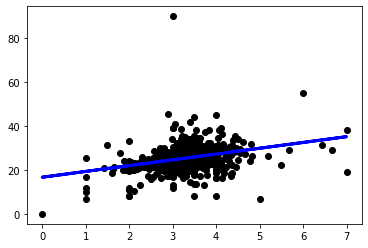

In [484]:
from sklearn.linear_model import LinearRegression

df_regress = pd.read_csv(path +"\\Regression Data.csv")
y = df_regress["Gross Income"].values.reshape(-1, 1)
x = df_regress["Scores"].values.reshape(-1, 1)

model = LinearRegression()

model.fit(x, y)

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)

In [486]:
print(model.coef_)
print(model.score(x, y))
print(model.intercept_)

[[2.63824223]]
0.0917842490081271
[16.7040489]


Our regression outputs $Gross Income = 16.7 + 2.64*Region Scores$ with a $R^2$ of only  0.092